<a href="https://colab.research.google.com/github/Ismail26/Andela-Capstone-Project/blob/master/Ismail_Olajide_DSNInternshipCodingAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Welcome to the DSN Internship Coding Challenge! This assessment will put your Natural Language Processing (NLP) and problem-solving abilities to the test. :

- Section one of the assessmnet will require you to build a text classification model.

Good luck! If you have questions about the framing of the questions, please contact **recruitment@datasciencenigeria.ai**

### How to Use and Submit this Notebook.
- Make a copy of this document and rename it **Firstname_Lastname_DSNInternshipCodingAssessment.ipynb**
- Before attempting to submit, ensure that you have ran all of the cells in your notebook and the output visible.
- Once you’ve completed all tasks, save and download a copy of the notebook as .ipynb
- Submit a link (make sure that the link is set to "Anyone on the internet with the link can view"), the downloaded copy of your final notebook via this [link](https://forms.gle/t8sFNrfAymZUrfJq7).

### What Not to Do.
- Do not share this document with any external party
- No teamwork is permitted
- After submitting a copy of your script, you are not permitted to make any changes to the online version; any discrepancy between the online and submitted copies will render your application null and void.

### Dataset

This is a news [dataset](https://drive.google.com/file/d/1NgPM7_mFCDKnuqI9SamMCrkF1mE5AgAI/view?usp=sharing) which contains 2225 examples of news articles with their respective labels. Use to the link to learn more about the dataset

## Section 1

### Task

**This is to test your knowledge on NLP**

Build and train a machine learning model with the provided dataset to classify the news category or topic. You can use any architecture or model, in this test.

**Make sure to plot the accuracy vs epochs and loss vs epochs graphs**

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import nltk
from nltk.corpus import stopwords
import os
os.getcwd()


'/content'

In [ ]:
#read csv data

bbc_text = pd.read_csv(r'/bbc-text.csv')

In [ ]:
print (bbc_text)

           category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


In [ ]:
# data exploration
bbc_text.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
# checking count for each text category
bbc_text['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
# checking for null values
bbc_text.isnull().sum()

category    0
text        0
dtype: int64

In [ ]:

nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# preprocessing the data
# Removing stopwords from sentences (text) and label (category)

sentences = []
labels = []

with open('/bbc-text.csv','r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopWords:
            token = ' ' + word + ' '
            sentence = sentence.replace(token, ' ')
            sentence = sentence.replace(' ', ' ')
        sentences.append(sentence)

print(len(sentences))
print(len(labels))



2225
2225


In [ ]:
# creating features and training for model building

train_size = int(len(sentences) * 0.8)

train_sentences = sentences[0: train_size]
train_labels = labels[0: train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print("train_size is", train_size)
print("number of train_sentences is ",len(train_sentences))
print("number of train_labels is ", len(train_labels))
print("number of validation_sentences is ",len(validation_sentences))
print("number of validation_labels is ",len(validation_labels))

train_size is 1780
number of train_sentences is  1780
number of train_labels is  1780
number of validation_sentences is  445
number of validation_labels is  445


In [ ]:
# hyper-parameters required to build model

vocab_size = 3000
embedding_dim = 64
max_length = 180
trunc_type='post'
padding_type='post'
oov_tok = ""

In [ ]:
# Applying tokenization, convert to sequence, truncating and padding to train and validation sentences#

# perform tokenization

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert to sequence
train_sequences = tokenizer.texts_to_sequences(train_sentences)

# truncating and padding sequence
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[5]))
print(len(train_padded[5]))

426
180
355
180


In [ ]:
# convert to sequence, padding and truncating for validation sentence
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)



445
(445, 180)


In [ ]:
# applyimg tokenization on label features

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[1])
print(training_label_seq.shape)

print(validation_label_seq[1])
print(validation_label_seq.shape)

[2]
(1780, 1)
[4]
(445, 1)


In [ ]:
# building machine learning model architecture

ml_Model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Adam optimizer was used to compile the model to configure the training process with the loss sparse_categorical_crossentropy since an one-hot encoding of the labels was not done.
ml_Model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ml_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 180, 64)           192000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 193,710
Trainable params: 193,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# defining number of epoch

num_epochs = 20
history = ml_Model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=1)

Epoch 1/20
56/56 [==============================] - 2s 11ms/step - loss: 1.7204 - accuracy: 0.4421 - val_loss: 1.6115 - val_accuracy: 0.4270
Epoch 2/20
56/56 [==============================] - 0s 6ms/step - loss: 1.4340 - accuracy: 0.4691 - val_loss: 1.2392 - val_accuracy: 0.5640
Epoch 3/20
56/56 [==============================] - 0s 7ms/step - loss: 1.0223 - accuracy: 0.7006 - val_loss: 0.8654 - val_accuracy: 0.8697
Epoch 4/20
56/56 [==============================] - 0s 6ms/step - loss: 0.6691 - accuracy: 0.9191 - val_loss: 0.5782 - val_accuracy: 0.9236
Epoch 5/20
56/56 [==============================] - 0s 7ms/step - loss: 0.4172 - accuracy: 0.9562 - val_loss: 0.3947 - val_accuracy: 0.9416
Epoch 6/20
56/56 [==============================] - 0s 7ms/step - loss: 0.2598 - accuracy: 0.9775 - val_loss: 0.2825 - val_accuracy: 0.9618
Epoch 7/20
56/56 [==============================] - 0s 7ms/step - loss: 0.1690 - accuracy: 0.9871 - val_loss: 0.2224 - val_accuracy: 0.9685
Epoch 8/20
56/56 [=

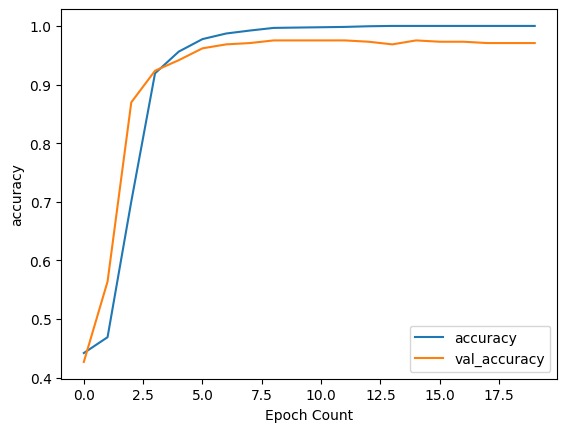

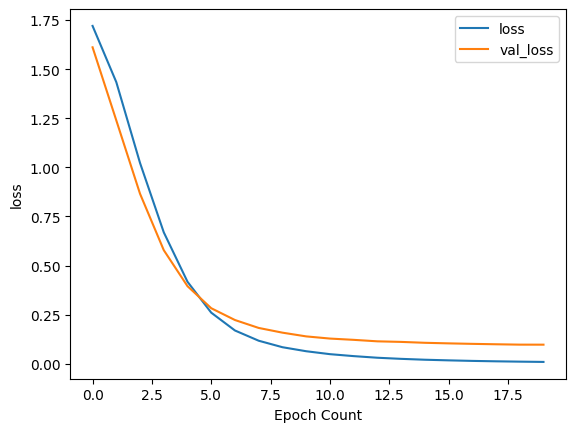

In [ ]:
# plotting graph of history for accuracy and loss

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epoch Count")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")